# Convolutional Neural Networks

- Here we are implementing the Conv2D layer and MaxPool2D layers to identify and classify the fashion mnist dataset
- Here we are performing `softmax` Classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
fmnist=tf.keras.datasets.fashion_mnist

In [3]:
(X_train,Y_train),(X_test,Y_test)=fmnist.load_data()

### Getting familier with the dimentions of our data

In [4]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Image data Normalization

- We will normalize the data by performing division by 255
- As the max and min values in an image data are `0-255`, the above normalization will rescale our data to `0-1` scale

In [5]:
X_train=X_train/255.
X_test=X_test/255.

### Model architecture

- `64` filters convolutional layer with filter window size `(3,3)` (`relu` activation)
- Pooling layer with window size `(2,2)`
- `64` filters convolutional layer with filter window size `(3,3)` (`relu` activation)
- Pooling layer with window size `(2,2)`
- Dense layer with `128` neurons with `relu` activation
- Dense layer with `10` neurons with `softmax` activation

In [43]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

### Loss functions and metrics

- Loss: SparseCategoricalCrossntropy (softmax loss function)
- optimizer: Adam (for efficient gradient descent)
- metrics: Accuracy

In [44]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

### Training the model

In [45]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.4370 - accuracy: 0.8408
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2917 - accuracy: 0.8927
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2474 - accuracy: 0.9083
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2131 - accuracy: 0.9200
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1852 - accuracy: 0.9304
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1635 - accuracy: 0.9387
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1422 - accuracy: 0.9465
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1234 - accuracy: 0.9535
Epoch 9/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1052 - accuracy: 0.9604
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

### Evaluating the results

In [46]:
test_loss=model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.3085 - accuracy: 0.9088


### Visualizing the output of each layer with 3 images at a time

In [47]:
print(Y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8
 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 38ms/step


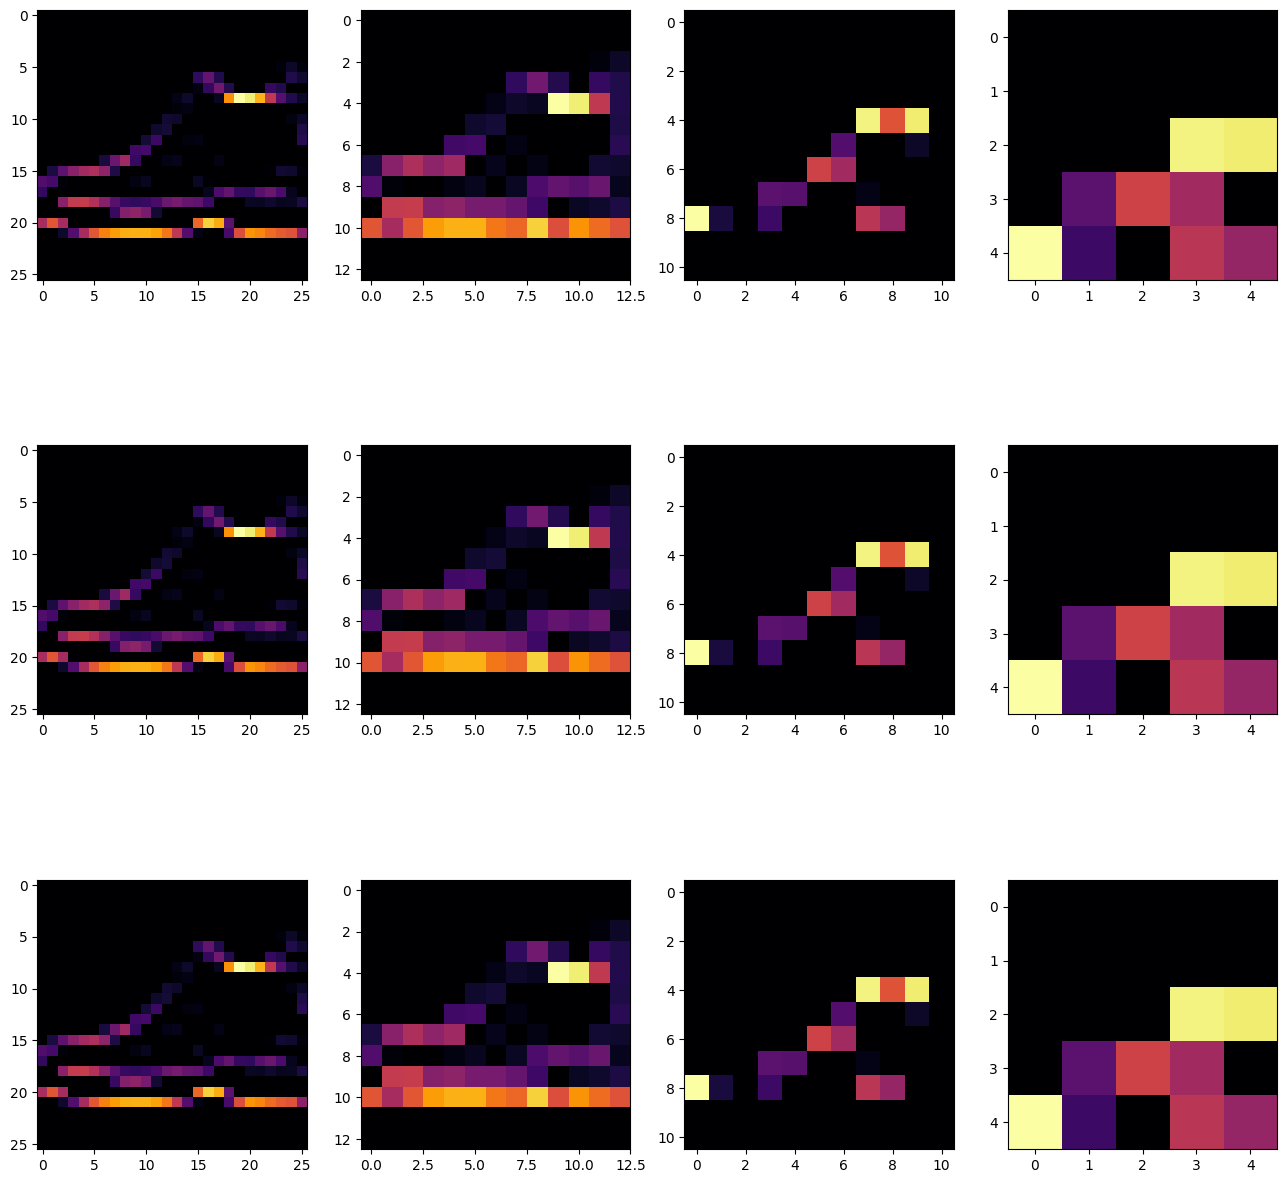

In [49]:
fig,ax=plt.subplots(3,4,figsize=(16,16))

FIRST_IMAGE=0
SECOND_IMAGE=1
THIRD_IMAGE=2
CONVOLUTION_NUMBER=0

output_layers=[layers.output for layers in model.layers]
layer_wise=tf.keras.models.Model(inputs=model.input,outputs=output_layers)

for i in range(0,4):
    img1=layer_wise.predict(X_test[FIRST_IMAGE].reshape(1,28,28,1))[i]
    ax[0,i].imshow(img1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')

    img2=layer_wise.predict(X_test[SECOND_IMAGE].reshape(1,28,28,1))[i]
    ax[1,i].imshow(img1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')

    img3=layer_wise.predict(X_test[THIRD_IMAGE].reshape(1,28,28,1))[i]
    ax[2,i].imshow(img1[0,:,:,CONVOLUTION_NUMBER],cmap='inferno')